In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline

# Data 

In [2]:
data_path = 'D:\ML_Data\gestures-mnist'
os.listdir(data_path)

['american_sign_language.PNG',
 'amer_sign2.png',
 'amer_sign3.png',
 'sign_mnist_test',
 'sign_mnist_test.csv',
 'sign_mnist_train',
 'sign_mnist_train.csv']

In [3]:
train_data_name = '\\sign_mnist_train.csv'
test_data_name = '\\sign_mnist_test.csv'
train_data = pd.read_csv(data_path + train_data_name)
test_data = pd.read_csv(data_path + test_data_name)

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
class_names = np.array([chr(ord('A') + i) for i in range(26)])
class_names

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='<U1')

In [6]:
train_labels = train_data['label'].values
test_labels = test_data['label'].values
train_data.drop(['label'], axis=1, inplace=True)
test_data.drop(['label'], axis=1, inplace=True)

In [7]:
train_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


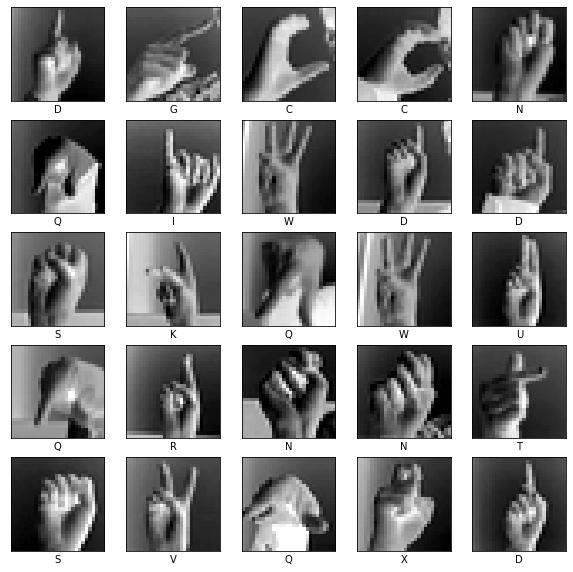

In [8]:
plt.figure(figsize=(10,10))
train_image_data = train_data.values
test_image_data = test_data.values
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image_data[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

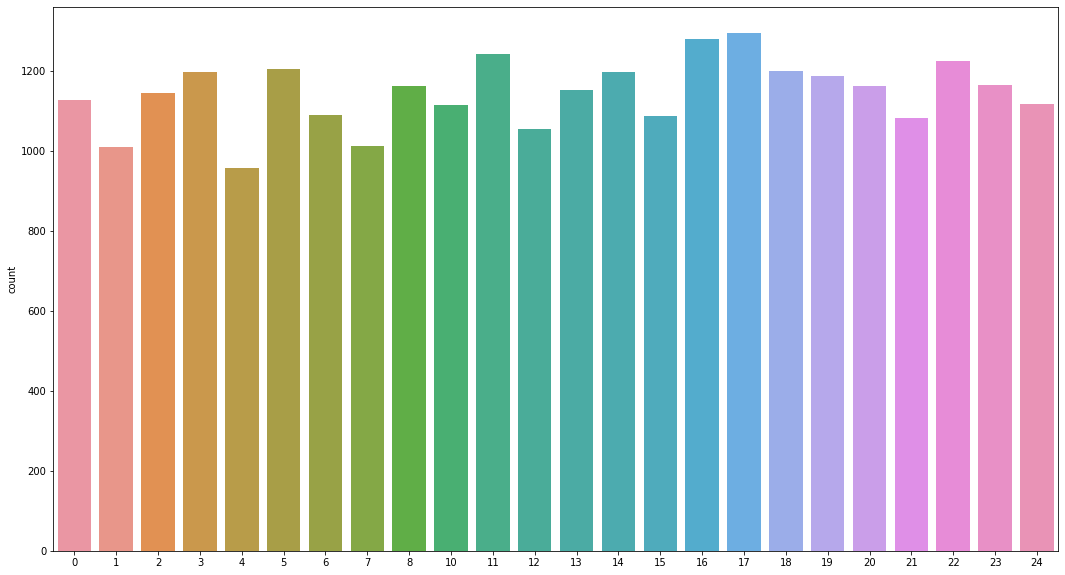

In [9]:
plt.figure(figsize=(18,10))
sns.countplot(x=train_labels)

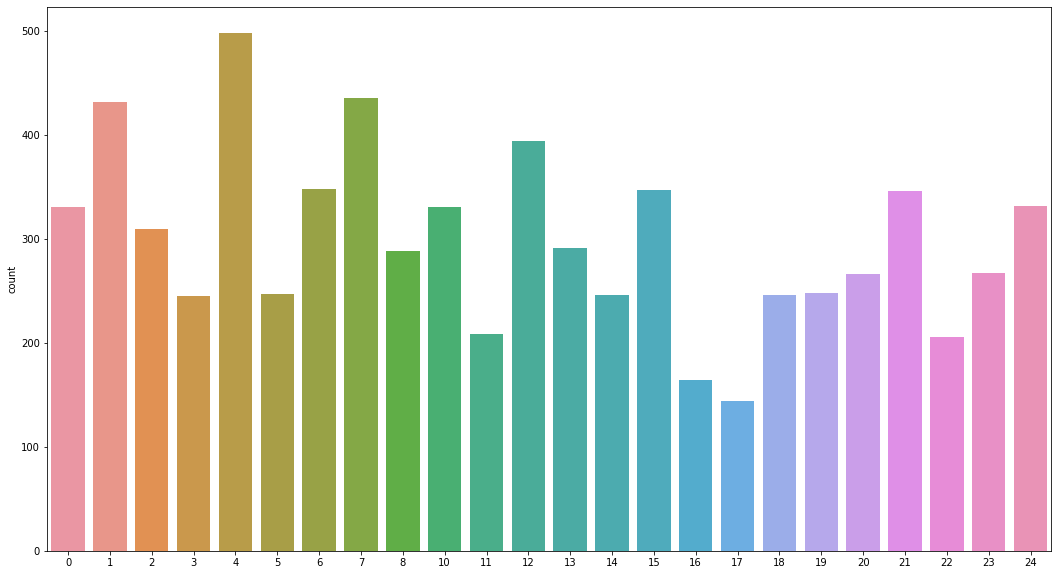

In [10]:
plt.figure(figsize=(18,10))
sns.countplot(x=test_labels)

In [11]:
data_joined = np.concatenate((train_image_data, test_image_data), axis=0)

In [12]:
labels_joined = np.concatenate((train_labels, test_labels), axis=0)

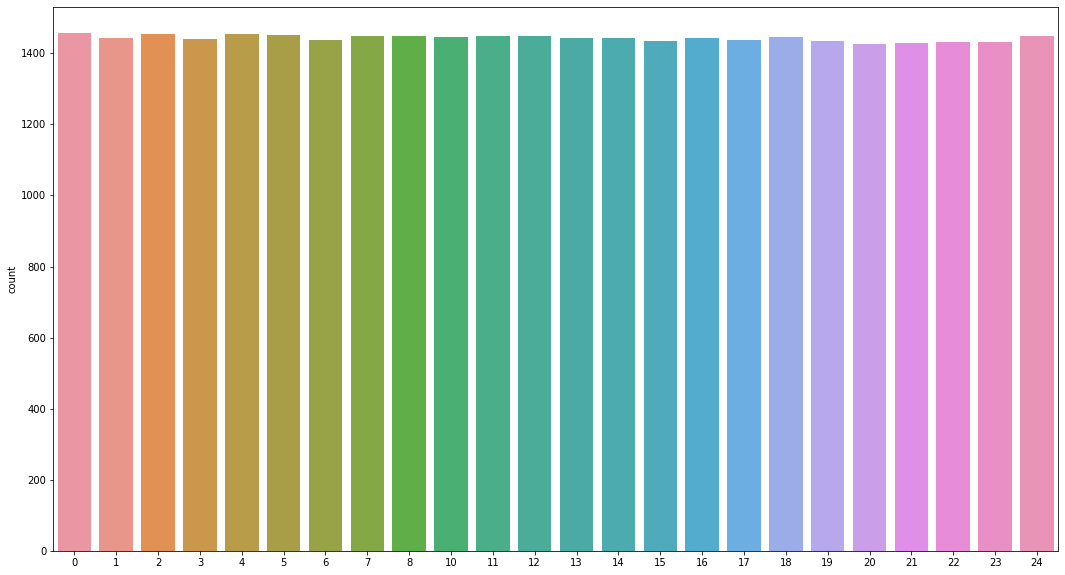

In [13]:
plt.figure(figsize=(18,10))
sns.countplot(x=labels_joined)

In [14]:
data_joined = data_joined / 255

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_joined, labels_joined, test_size=0.33, random_state=42, shuffle=True)

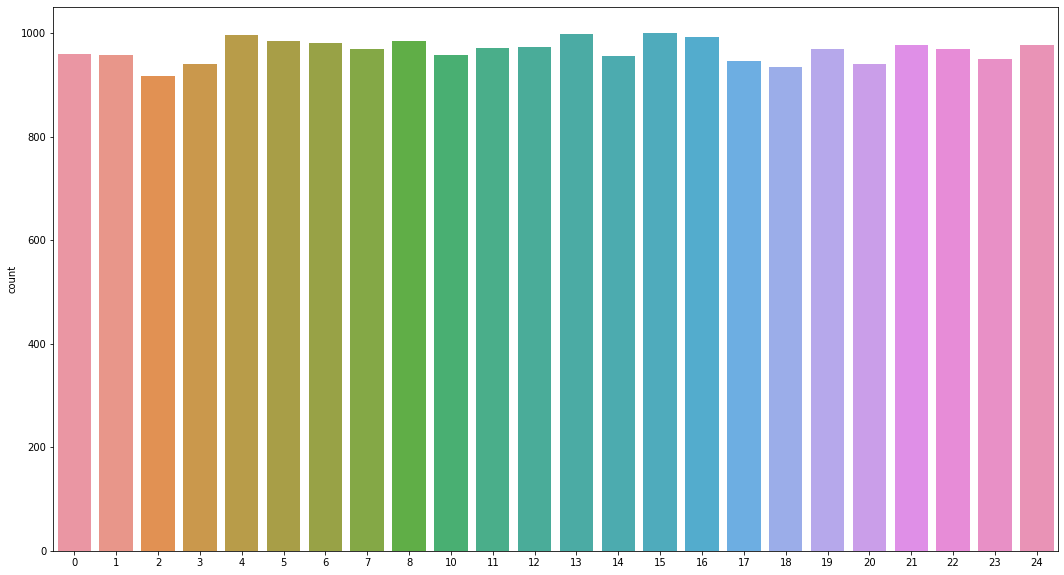

In [16]:
plt.figure(figsize=(18,10))
sns.countplot(x=y_train)

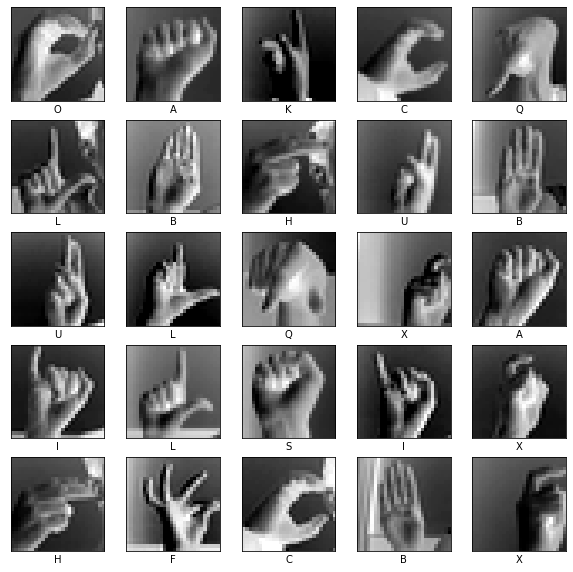

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [18]:
X_train[0].shape

(784,)

In [19]:
X_train.shape

(23200, 784)

In [20]:
X_train = np.reshape(a=X_train, newshape=(X_train.shape[0], 28, 28))
X_test = np.reshape(a=X_test, newshape=(X_test.shape[0], 28, 28))

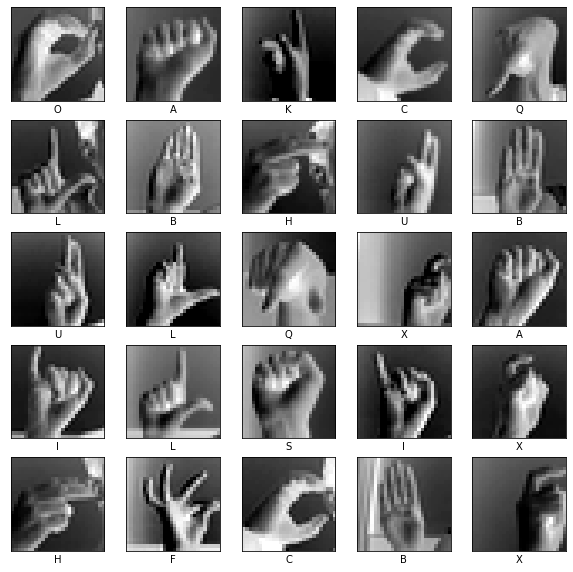

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

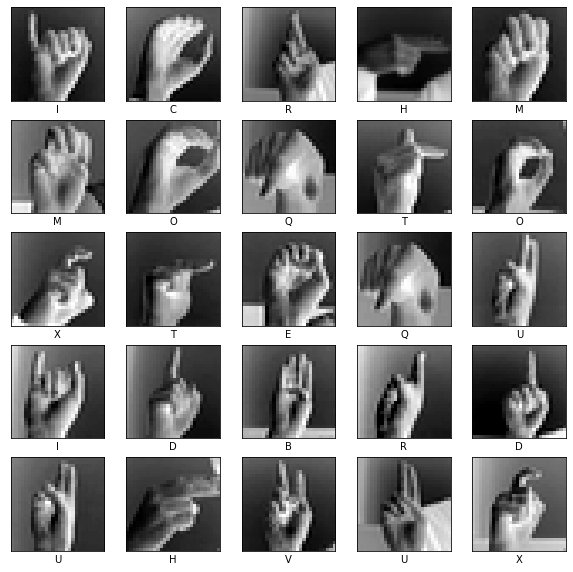

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])

In [23]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
X_train.shape, X_test.shape

((23200, 28, 28, 1), (11427, 28, 28, 1))

# Tunings

In [24]:
epochs = 50
batch_size = 64
class_num = 25

In [25]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [27]:
y_train = keras.utils.to_categorical(
    y=y_train,
    num_classes=25
)
y_test = keras.utils.to_categorical(
    y=y_test,
    num_classes=25
)

# Model

In [28]:
model = keras.Sequential()

# Conv level 1
model.add(keras.layers.Conv2D(64, strides=(1,1), padding='Same', kernel_size=(3,3), 
                              activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(64, strides=(1,1), padding='Same', kernel_size=(3,3), 
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.3))

# Conv level 2
model.add(keras.layers.Conv2D(64, strides=(1,1), padding='Same', kernel_size=(3,3), 
                              activation='relu'))
model.add(keras.layers.Conv2D(64, strides=(1,1), padding='Same', kernel_size=(3,3), 
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.3))

# Conv level 3
model.add(keras.layers.Conv2D(64, strides=(1,1), padding='Same', kernel_size=(3,3), 
                              activation='relu'))
model.add(keras.layers.Conv2D(64, strides=(1,1), padding='Same', kernel_size=(3,3), 
                              activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(keras.layers.Dropout(0.3))

# Solid hidden level
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = 'relu'))

# Output level
model.add(keras.layers.Dropout(0.50))
model.add(keras.layers.Dense(class_num, activation='softmax')) #24, but J and Z make 25

W0922 18:42:22.831486  4828 deprecation.py:506] From C:\Users\User\Anaconda3\envs\py36tf\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [29]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs = epochs, 
    validation_data = (X_test, y_test),
    verbose = 1, 
    steps_per_epoch=X_train.shape[0] // batch_size, 
    callbacks=[learning_rate_reduction]
)

Epoch 1/100
362/362 [==============================] - 121s 336ms/step - loss: 3.1478 - acc: 0.0615 - val_loss: 2.5574 - val_acc: 0.2403
Epoch 2/100
362/362 [==============================] - 111s 308ms/step - loss: 2.3740 - acc: 0.2602 - val_loss: 1.2884 - val_acc: 0.6087
Epoch 3/100
362/362 [==============================] - 109s 300ms/step - loss: 1.5230 - acc: 0.4882 - val_loss: 0.5050 - val_acc: 0.8278
Epoch 4/100
362/362 [==============================] - 113s 311ms/step - loss: 0.9687 - acc: 0.6668 - val_loss: 0.2694 - val_acc: 0.9128
Epoch 5/100
362/362 [==============================] - 109s 301ms/step - loss: 0.6914 - acc: 0.7607 - val_loss: 0.1086 - val_acc: 0.9714
Epoch 6/100
362/362 [==============================] - 111s 306ms/step - loss: 0.5447 - acc: 0.8124 - val_loss: 0.0836 - val_acc: 0.9813
Epoch 7/100
362/362 [==============================] - 109s 302ms/step - loss: 0.4320 - acc: 0.8565 - val_loss: 0.0319 - val_acc: 0.9927
Epoch 8/100
362/362 [====================

KeyboardInterrupt: 

In [31]:
model.save(r'D:\ML_Data\models\gestures_models\v2.0_getures_model.model')